In [1]:
# 数据读取及基本处理
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

In [2]:
df1=pd.read_csv("D:\\AD\\AD 生化·流水线.csv")
df1.head()

,报告单元,样本日期,样本号,年龄,性别,临床诊断,科室,就诊卡号,病历号,ALT,...,TIBC,TSAT,D3H,NT-proBNP,HP,RBP,SAA,CalUTP,CalUCl,N-AMY
0,生化·流水线,2022/01/01,803,70岁,女,阿尔茨海默病,老年病科一病区,522632195112250021,00143532,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,生化·流水线,2022/01/01,804,56岁6月,男,阿尔茨海默病,精神科二病区,01001664,00140986,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,生化·流水线,2022/01/01,815,55岁7月,男,阿尔茨海默病,PICU,NaN,00140599,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,生化·流水线,2022/01/01,818,52岁9月,男,阿尔茨海默病,PICU,01006962,00138169,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,生化·流水线,2022/01/04,802,67岁2月,男,阿尔茨海默病,老年病科三病区,NaN,00139503,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2=pd.read_csv("D:\\AD\\AD 生化·综合项目.csv")
df2.head()

,报告单元,样本日期,样本号,年龄,性别,临床诊断,科室,就诊卡号,病历号,ALT,...,Fe.1,UIBC,TIBC,TSAT,D3H,NT-proBNP,RBP,SAA,HP,CalUCl
0,生化·综合项目,2022/01/01,2,72岁3月,男,阿尔茨海默病,重症监护住院,520102194909093439,00142424,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,生化·综合项目,2022/01/01,4,65岁7月,女,阿尔茨海默病,重症监护住院,063758,00141711,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,生化·综合项目,2022/01/02,3,72岁3月,男,阿尔茨海默病,重症监护住院,520102194909093439,00142424,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,生化·综合项目,2022/01/02,4,65岁7月,女,阿尔茨海默病,重症监护住院,063758,00141711,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,生化·综合项目,2022/01/02,17,79岁11月,女,阿尔茨海默病,心身科二病区,522328194201250423,00142692,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 横向合并两个DataFrame
data= pd.concat([df1, df2], axis=1)
data.head()

,报告单元,样本日期,样本号,年龄,性别,临床诊断,科室,就诊卡号,病历号,ALT,...,Fe.1,UIBC,TIBC,TSAT,D3H,NT-proBNP,RBP,SAA,HP,CalUCl
0,生化·流水线,2022/01/01,803,70岁,女,阿尔茨海默病,老年病科一病区,522632195112250021,00143532,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,生化·流水线,2022/01/01,804,56岁6月,男,阿尔茨海默病,精神科二病区,01001664,00140986,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,生化·流水线,2022/01/01,815,55岁7月,男,阿尔茨海默病,PICU,NaN,00140599,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,生化·流水线,2022/01/01,818,52岁9月,男,阿尔茨海默病,PICU,01006962,00138169,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,生化·流水线,2022/01/04,802,67岁2月,男,阿尔茨海默病,老年病科三病区,NaN,00139503,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#缺失值探索
data.isnull().sum()

报告单元            0
样本日期            0
样本号             0
年龄              0
性别              0
             ... 
NT-proBNP    3078
RBP          3897
SAA          3897
HP           3897
CalUCl       3897
Length: 218, dtype: int64

In [6]:
#缺失值探索
df1.isnull().sum()

报告单元         0
样本日期         0
样本号          0
年龄           0
性别           0
          ... 
RBP       3897
SAA       3897
CalUTP    3897
CalUCl    3897
N-AMY     3897
Length: 109, dtype: int64

In [7]:
#缺失值探索
df2.isnull().sum()

报告单元            0
样本日期            0
样本号             0
年龄              0
性别              0
             ... 
NT-proBNP    2717
RBP          3536
SAA          3536
HP           3536
CalUCl       3536
Length: 109, dtype: int64

In [8]:
#计算缺失值占百分比
miss_value=((df1.isnull().sum())/len(data))*100
print(miss_value.round(2))

报告单元        0.0
样本日期        0.0
样本号         0.0
年龄          0.0
性别          0.0
          ...  
RBP       100.0
SAA       100.0
CalUTP    100.0
CalUCl    100.0
N-AMY     100.0
Length: 109, dtype: float64


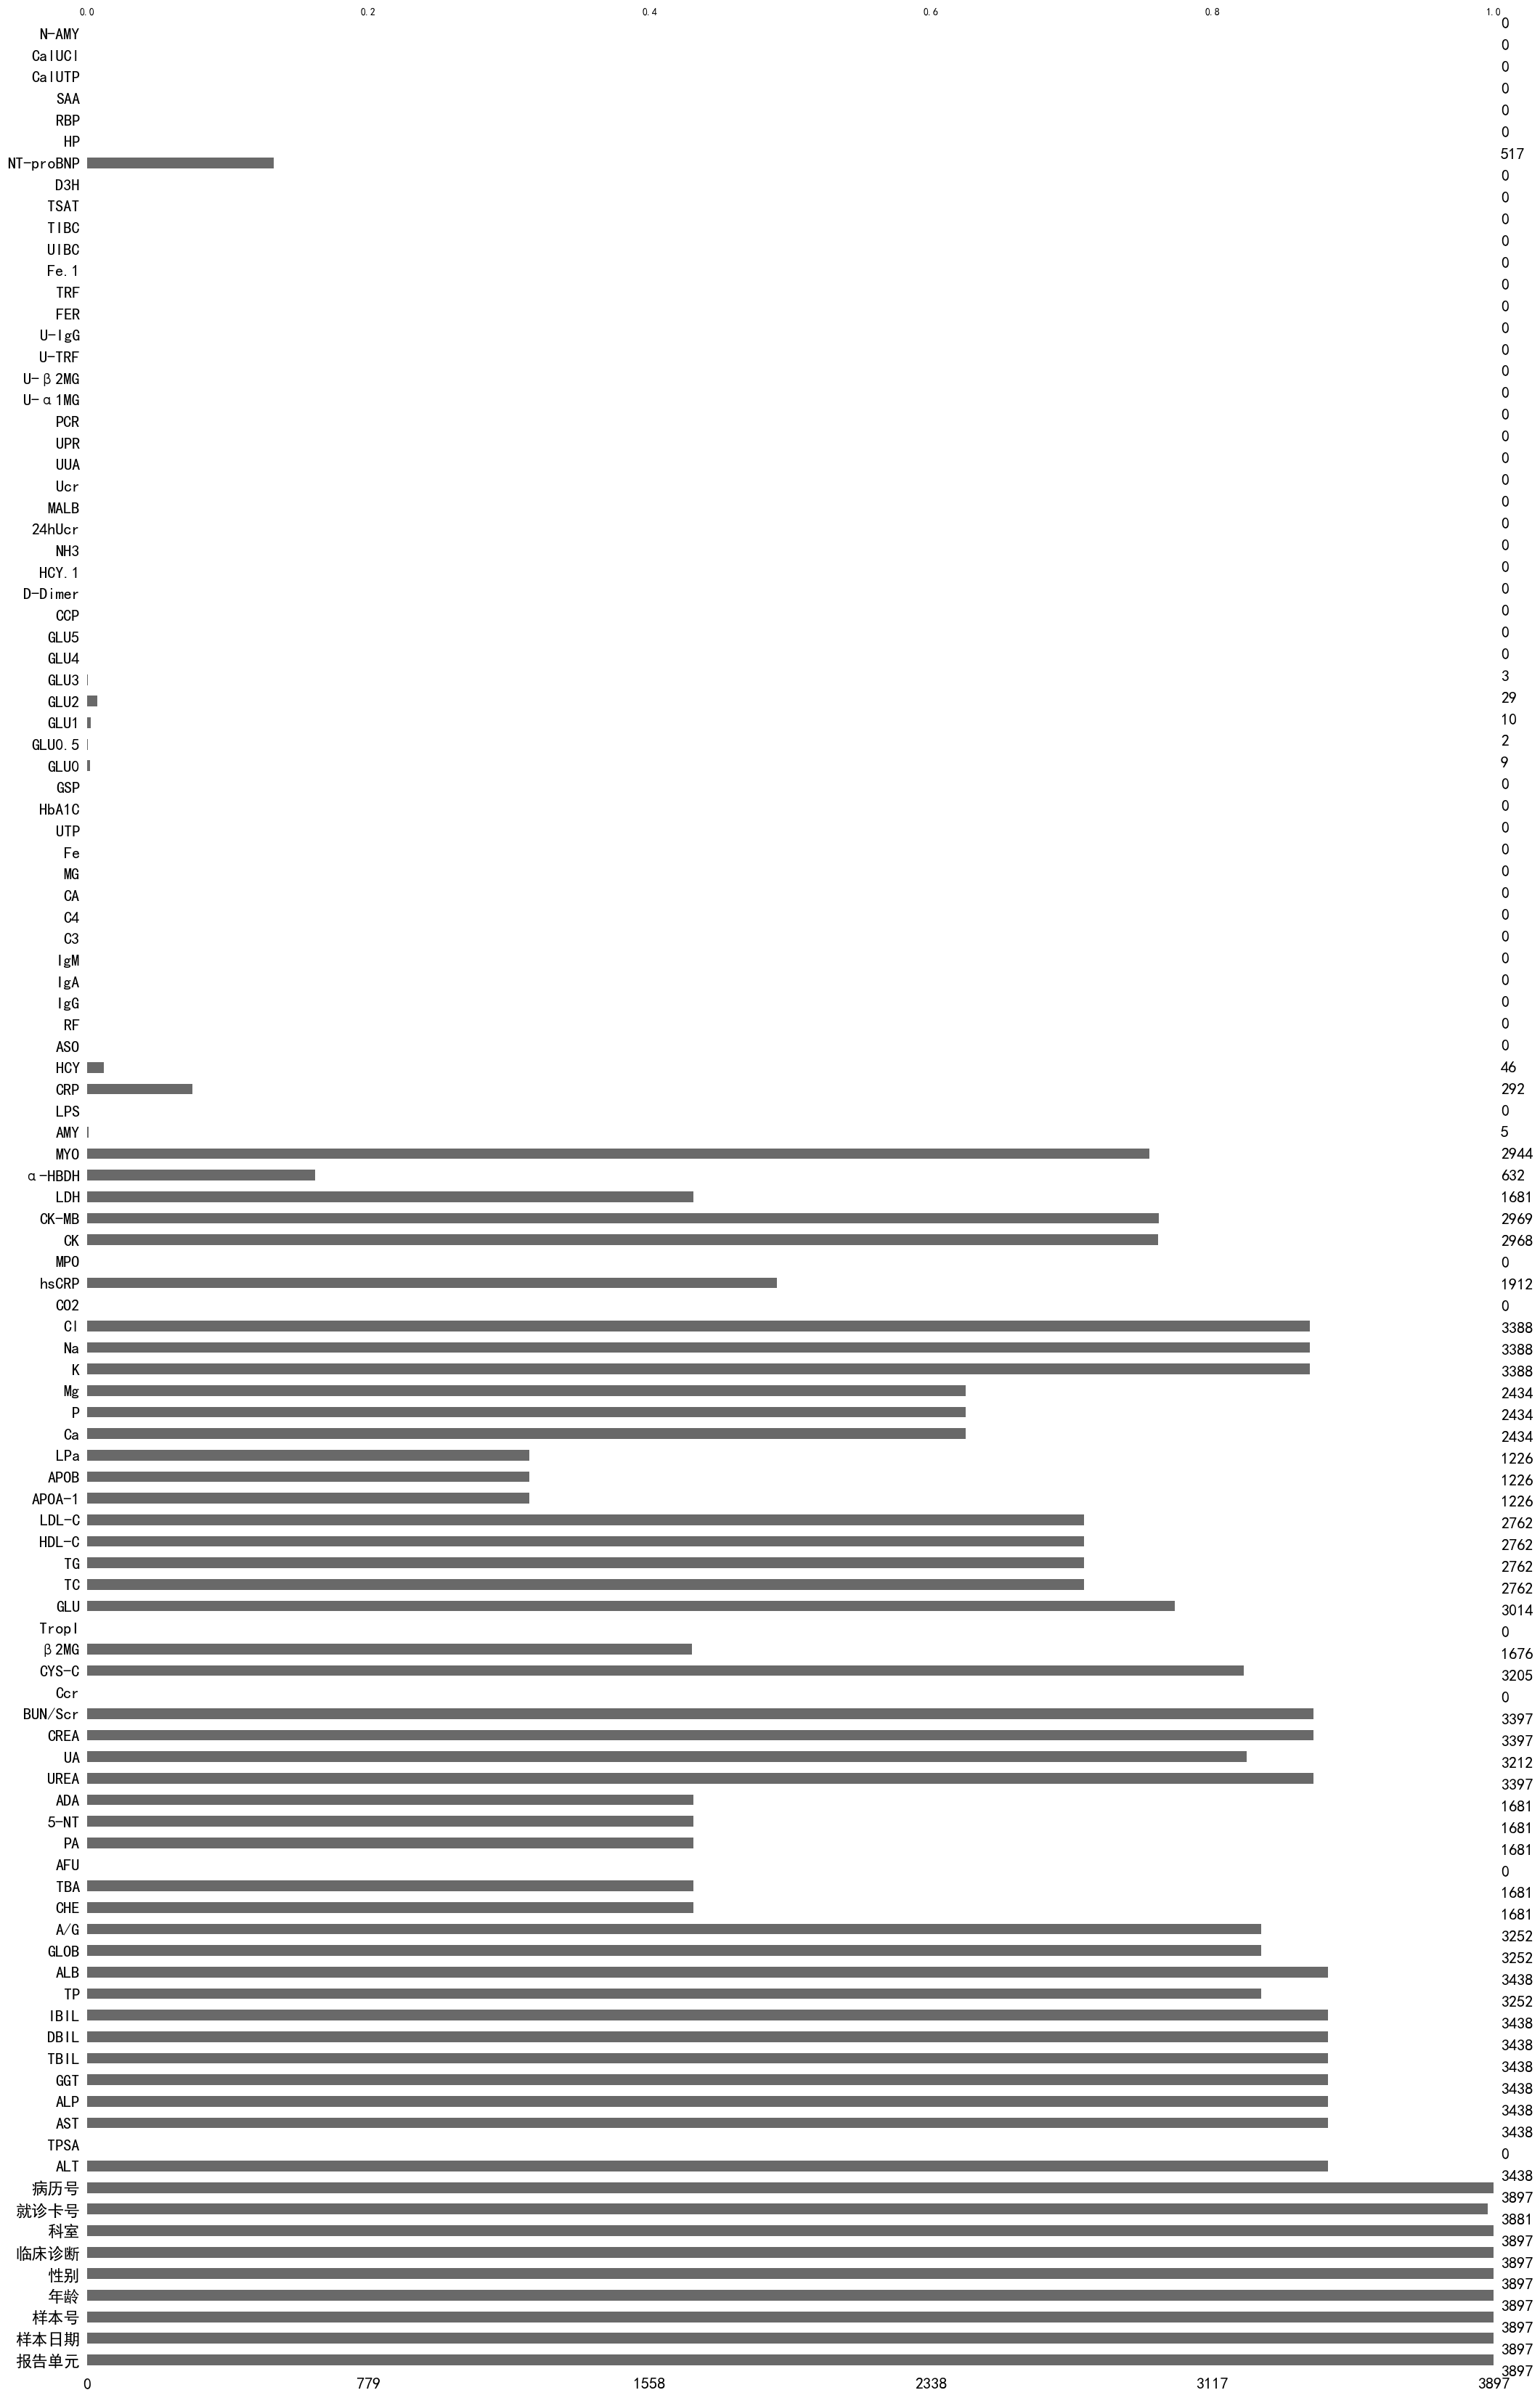

In [9]:
# 可视化缺失值
msno.bar(df1)
plt.show()

In [10]:
# 计算每列缺失值的数量
missing_values_count = df1.isnull().sum()

# 计算总行数
total_rows = df1.shape[0]

# 计算每列缺失值的比例
missing_values_ratio = (missing_values_count / total_rows) * 100

# 筛选缺失值比例大于或等于80%的列名
columns_with_high_missing = missing_values_ratio[missing_values_ratio >= 80].index.tolist()

# 打印这些列名
print(columns_with_high_missing)

['TPSA', 'AFU', 'Ccr', 'TropI', 'CO2', 'MPO', 'α-HBDH', 'AMY', 'LPS', 'CRP', 'HCY', 'ASO', 'RF', 'IgG', 'IgA', 'IgM', 'C3', 'C4', 'CA', 'MG', 'Fe', 'UTP', 'HbA1C', 'GSP', 'GLU0', 'GLU0.5', 'GLU1', 'GLU2', 'GLU3', 'GLU4', 'GLU5', 'CCP', 'D-Dimer', 'HCY.1', 'NH3', '24hUcr', 'MALB', 'Ucr', 'UUA', 'UPR', 'PCR', 'U-α1MG', 'U-β2MG', 'U-TRF', 'U-IgG', 'FER', 'TRF', 'Fe.1', 'UIBC', 'TIBC', 'TSAT', 'D3H', 'NT-proBNP', 'HP', 'RBP', 'SAA', 'CalUTP', 'CalUCl', 'N-AMY']


上述图，颜色深的表示数据存在，左边是数据的特征名，右边是数据的数量。
在上面图中，我们发现
‘TPSA', 'AFU', 'Ccr', 'TropI', 'CO2', 'MPO', 'α-HBDH', 'AMY', 'LPS', 'CRP', 'HCY', 'ASO', 'RF', 'IgG', 'IgA', 'IgM', 'C3', 'C4', 'CA', 'MG', 'Fe', 'UTP', 'HbA1C', 'GSP', 'GLU0', 'GLU0.5', 'GLU1', 'GLU2', 'GLU3', 'GLU4', 'GLU5', 'CCP', 'D-Dimer', 'HCY.1', 'NH3', '24hUcr', 'MALB', 'Ucr', 'UUA', 'UPR', 'PCR', 'U-α1MG', 'U-β2MG', 'U-TRF', 'U-IgG', 'FER', 'TRF', 'Fe.1', 'UIBC', 'TIBC', 'TSAT', 'D3H', 'NT-proBNP', 'HP', 'RBP', 'SAA', 'CalUTP', 'CalUCl', ‘N-AMY’这几个指标的缺失值高于80%

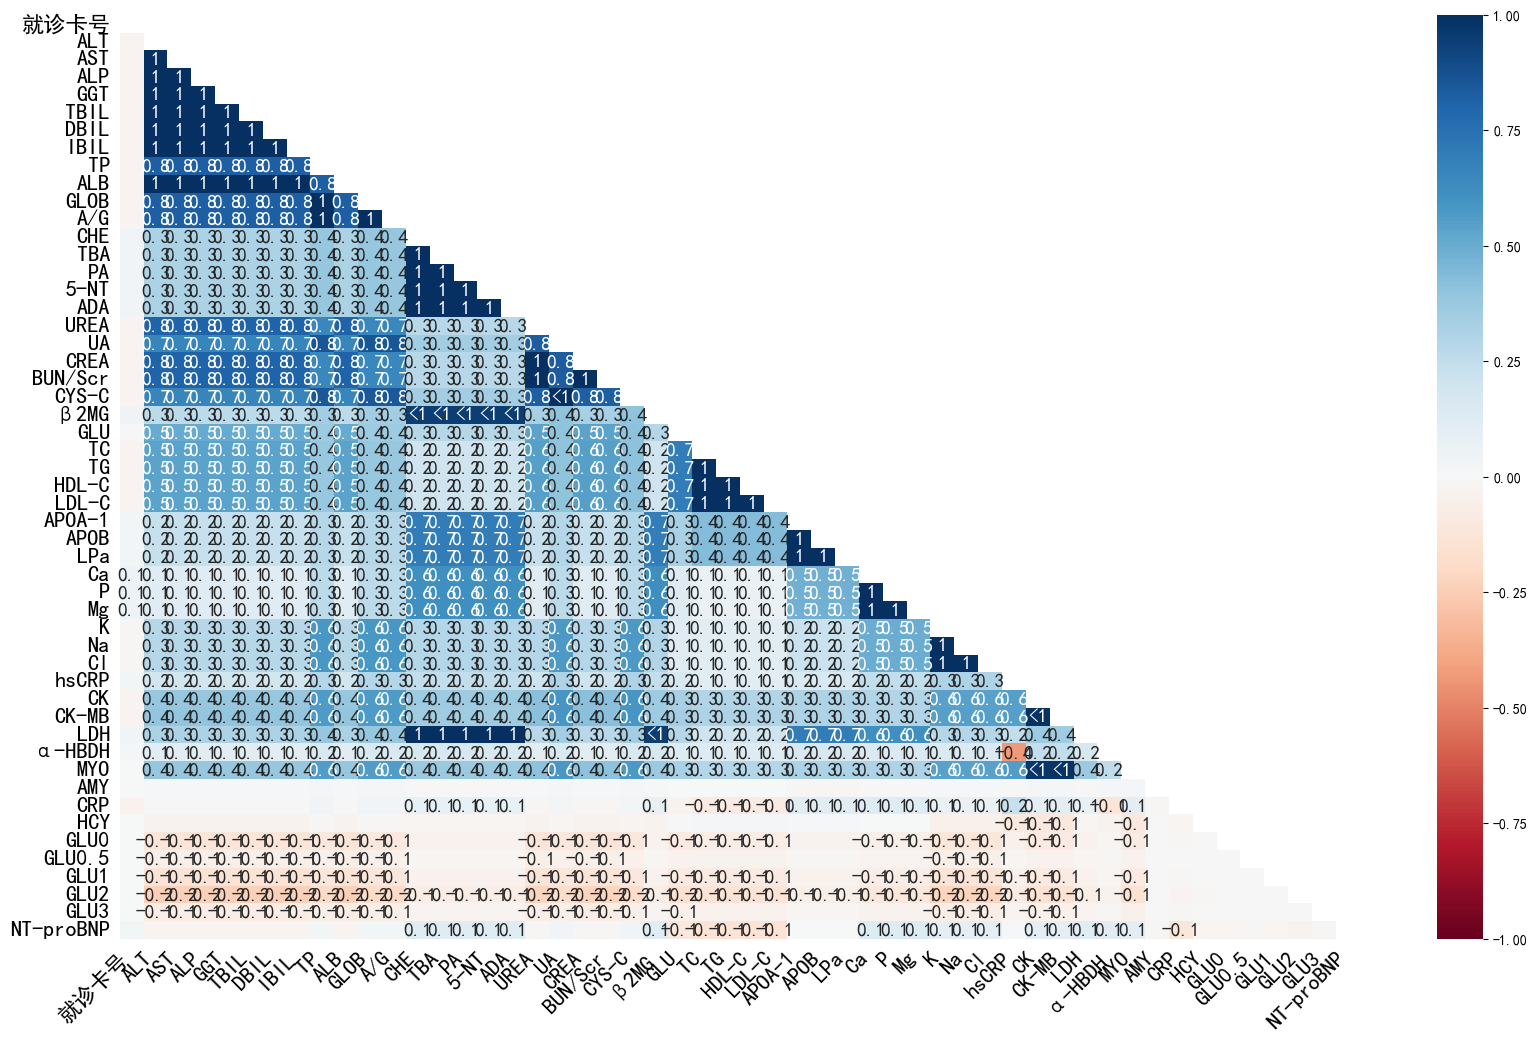

In [11]:
# 可视化缺失值
msno.heatmap(df1)
plt.show()

Heatmap函数将显示变量之间的缺失值协方差，以帮助我们了解缺失值出现的模式和分布。
通过上述的图片，颜色较浅的区域表示数据较为完整，而颜色较深的区域则表示数据缺失较多。

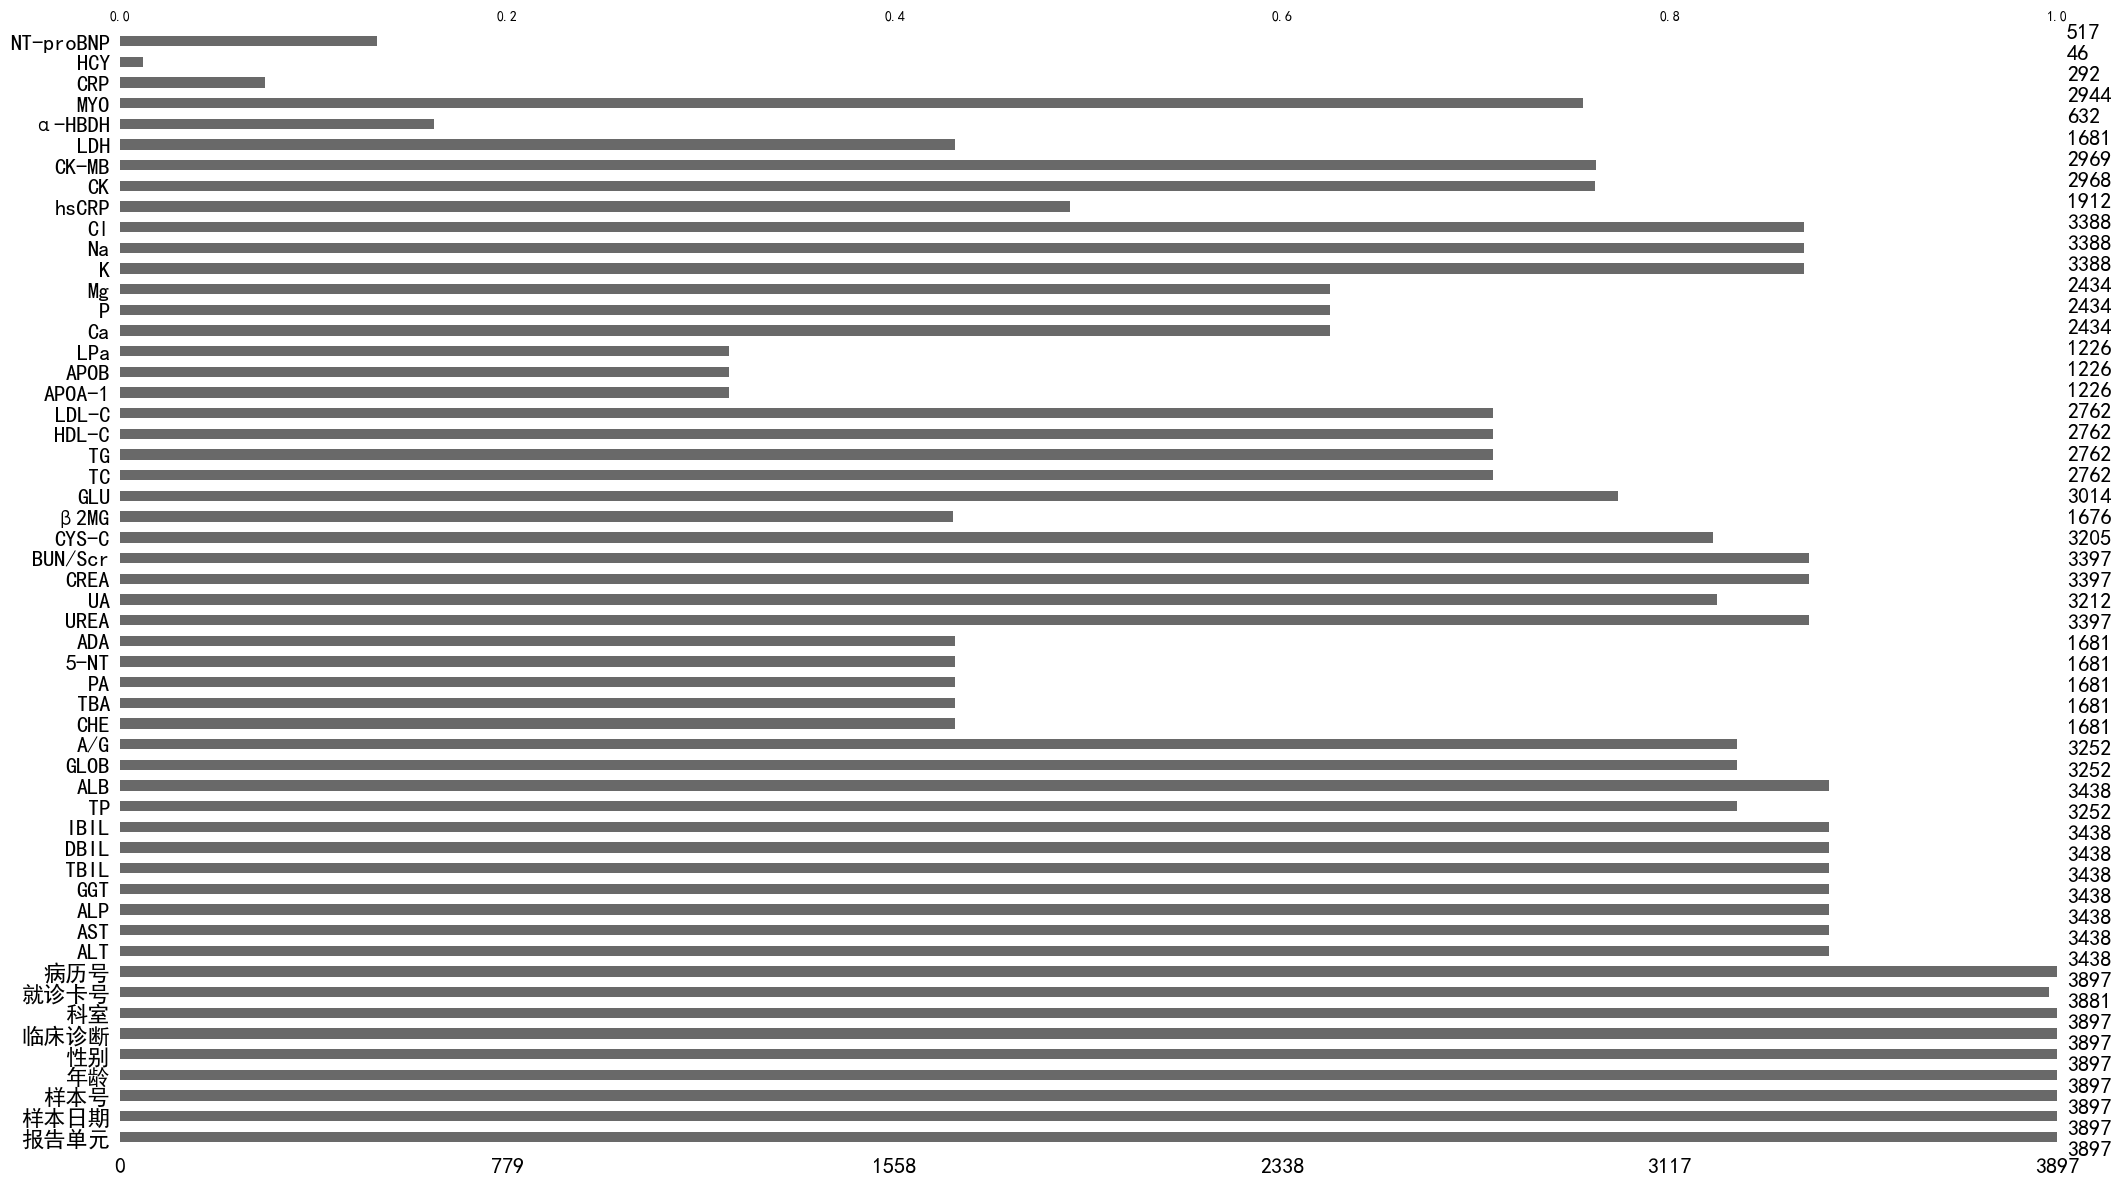

['报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'CHE', 'TBA', 'PA', '5-NT', 'ADA', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'β2MG', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 'APOA-1', 'APOB', 'LPa', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'hsCRP', 'CK', 'CK-MB', 'LDH', 'α-HBDH', 'MYO', 'CRP', 'HCY', 'NT-proBNP']


In [12]:
# 计算每列NaN的数量
nan_count_per_column = df1.isnull().sum()

# 获取DataFrame的总行数
total_rows = df1.shape[0]

# 计算每列NaN的占比
nan_percentage = (nan_count_per_column / total_rows) * 100

# 找出占比大于或等于99%的列名
columns_to_drop = nan_percentage[nan_percentage >= 99].index.tolist()

# 删除这些列
df1_cleaned = df1.drop(columns=columns_to_drop)

# 显示清洗后的DataFrame

# 可视化缺失值
msno.bar(df1_cleaned)
plt.show()


exist1= nan_percentage[nan_percentage <99].index.tolist()
print(exist1)

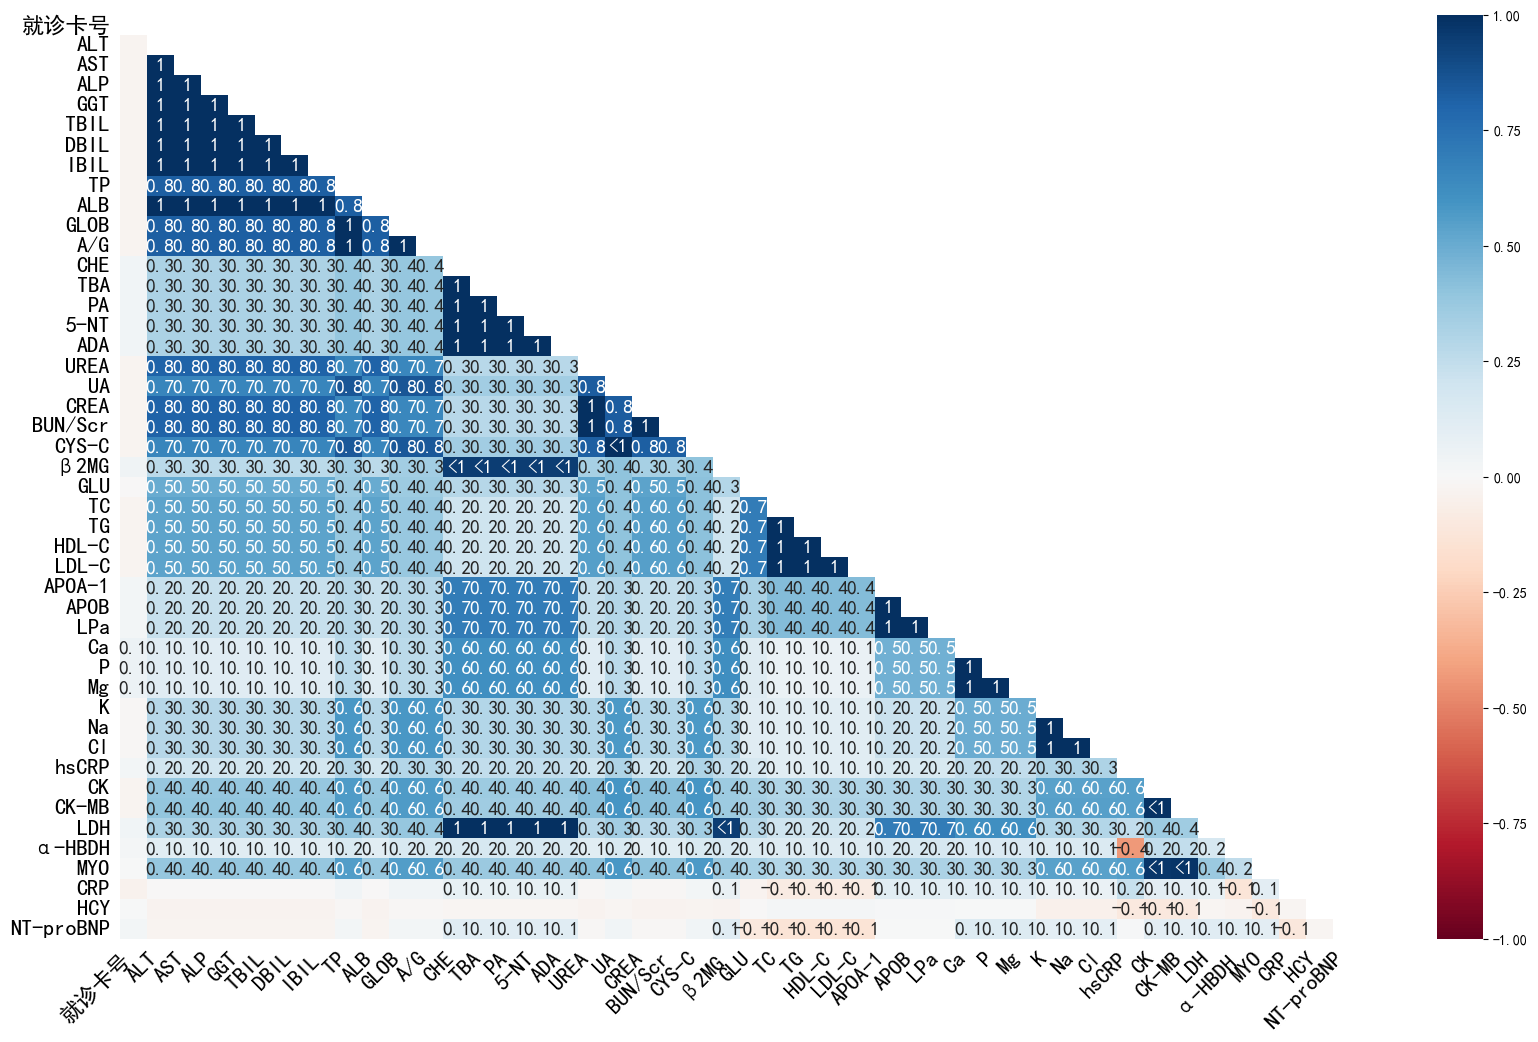

In [13]:
# 可视化缺失值
msno.heatmap(df1_cleaned)
plt.show()

In [14]:
#缺失值探索
df2.isnull().sum()

报告单元            0
样本日期            0
样本号             0
年龄              0
性别              0
             ... 
NT-proBNP    2717
RBP          3536
SAA          3536
HP           3536
CalUCl       3536
Length: 109, dtype: int64

In [15]:
#计算缺失值占百分比
miss_value=((df2.isnull().sum())/len(data))*100
print(miss_value.round(2))

报告单元          0.00
样本日期          0.00
样本号           0.00
年龄            0.00
性别            0.00
             ...  
NT-proBNP    69.72
RBP          90.74
SAA          90.74
HP           90.74
CalUCl       90.74
Length: 109, dtype: float64


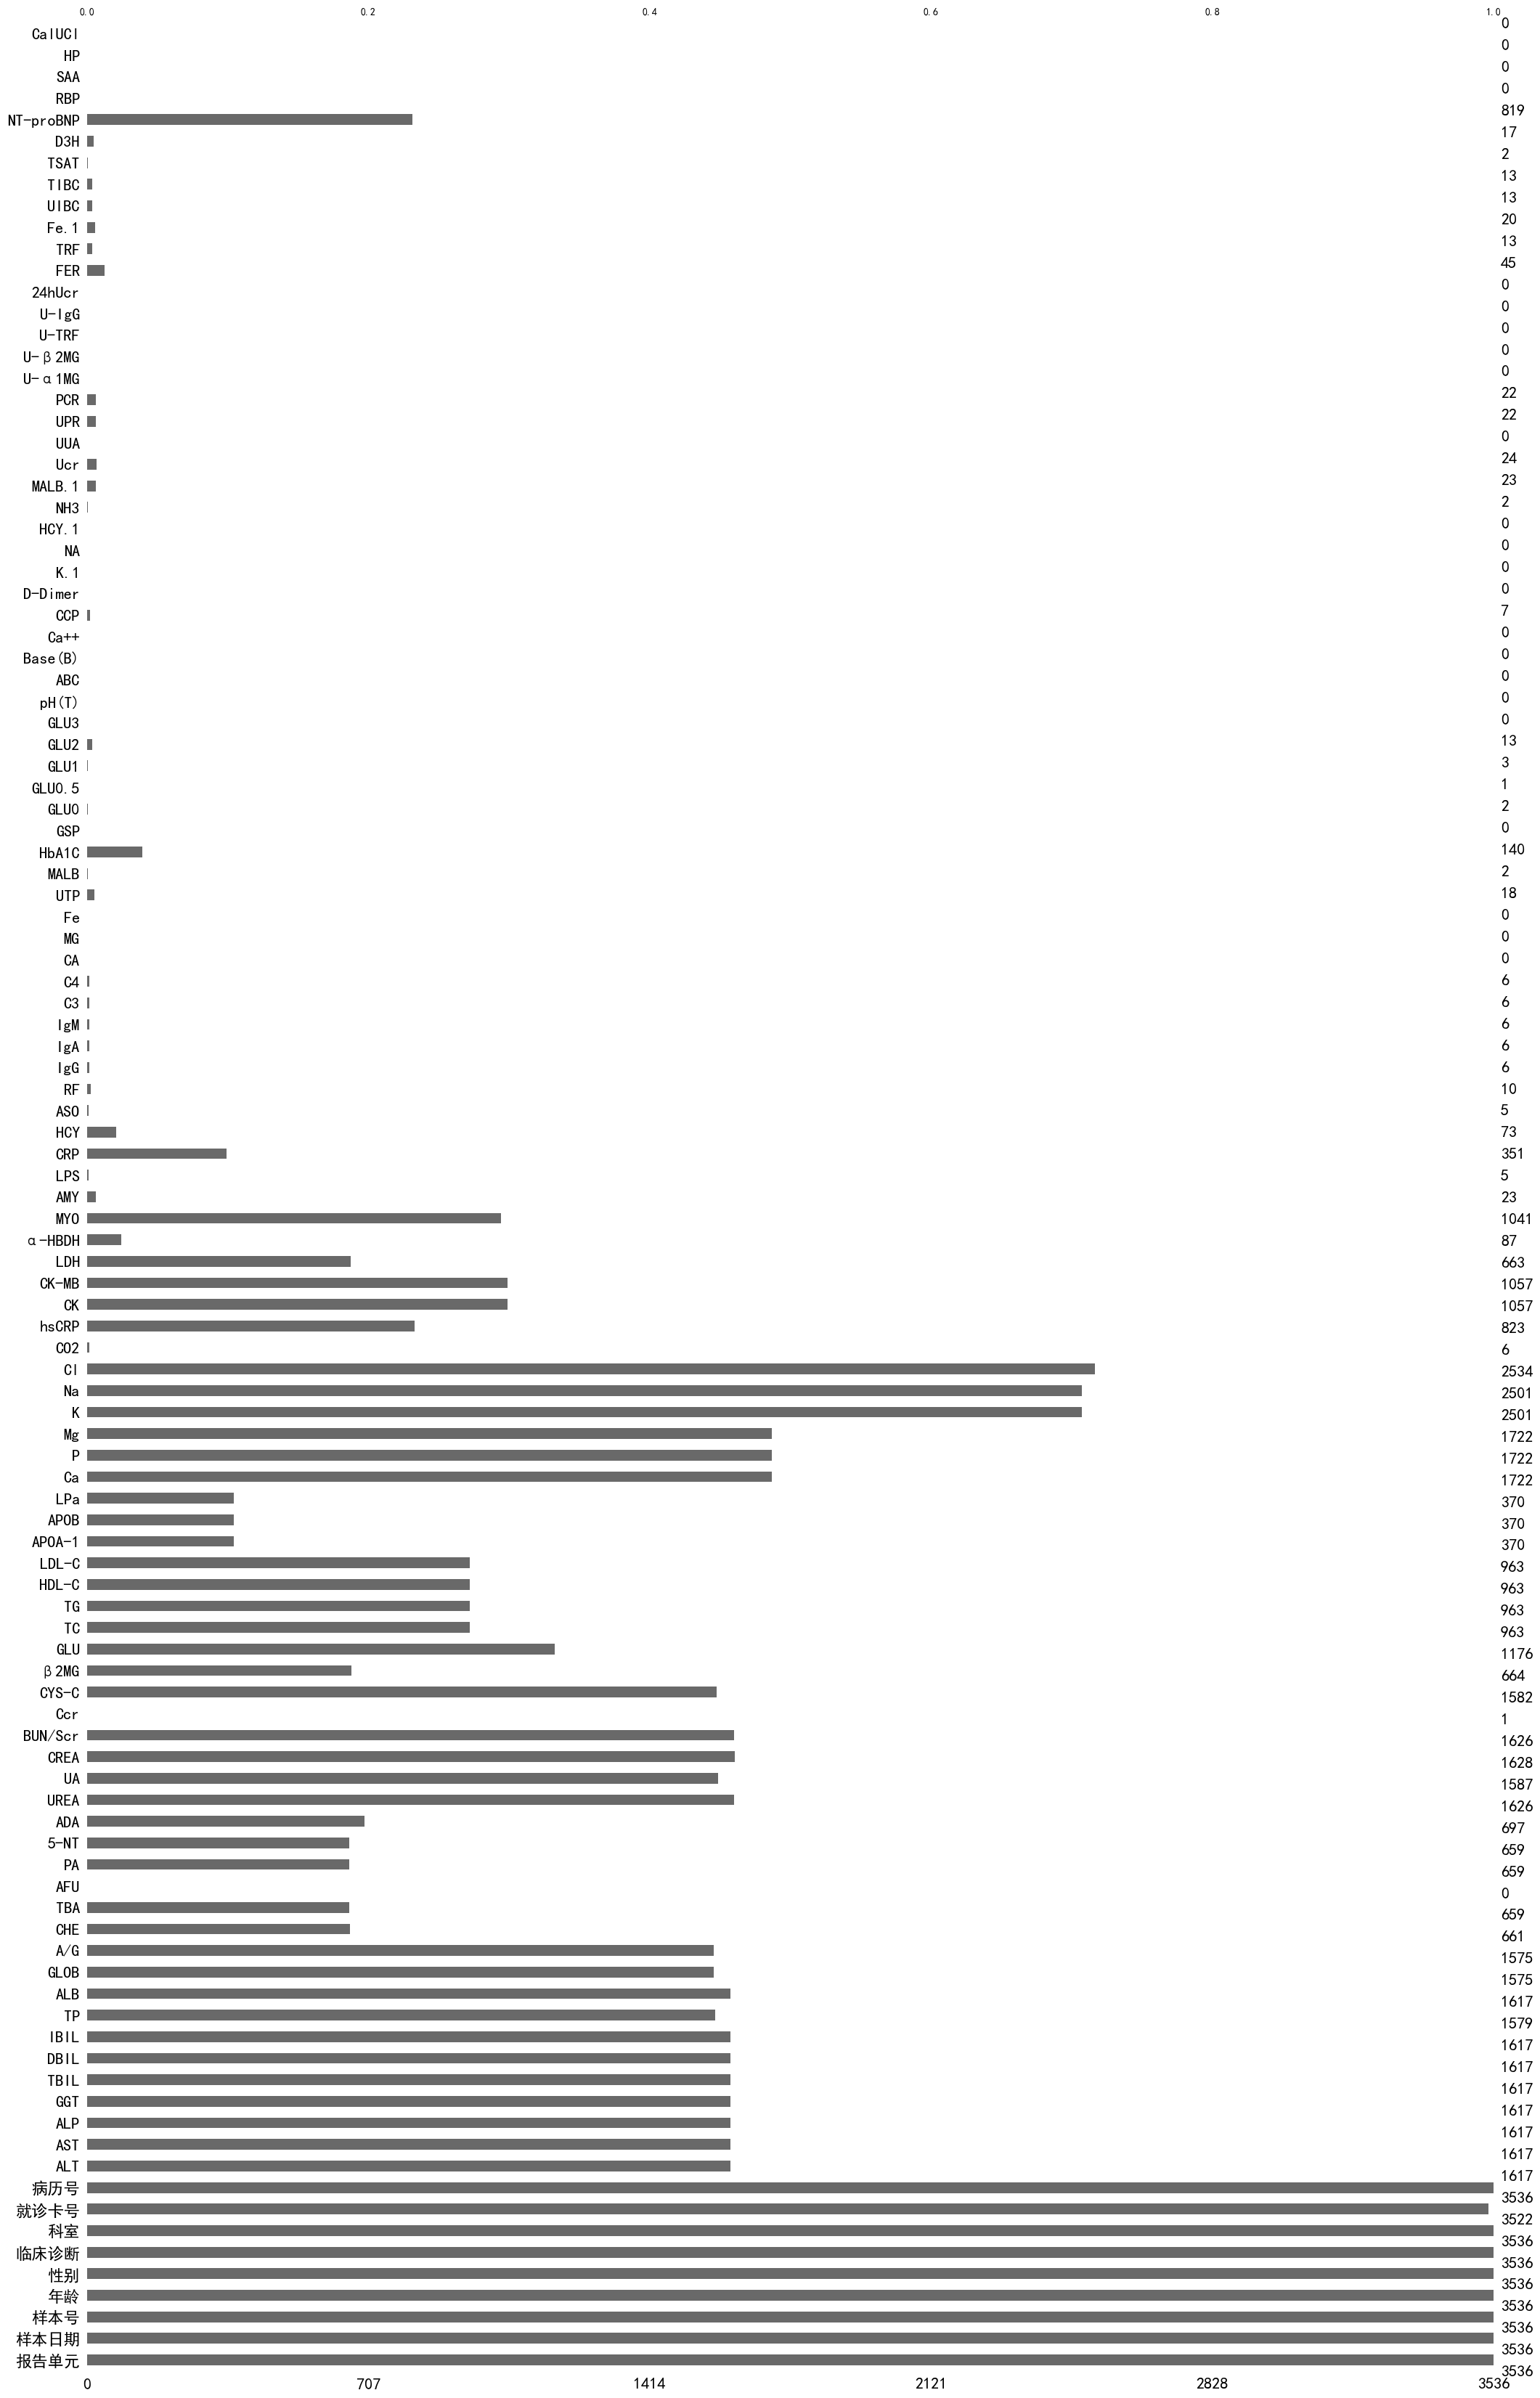

In [16]:
# 可视化缺失值
msno.bar(df2)
plt.show()

In [17]:
# 计算每列缺失值的数量
missing_values_count = df2.isnull().sum()

# 计算总行数
total_rows = df2.shape[0]

# 计算每列缺失值的比例
missing_values_ratio = (missing_values_count / total_rows) * 100

# 筛选缺失值比例大于或等于80%的列名
columns_with_high_missing = missing_values_ratio[missing_values_ratio >= 80].index.tolist()

# 打印这些列名
print(columns_with_high_missing)

['CHE', 'TBA', 'AFU', 'PA', '5-NT', 'ADA', 'Ccr', 'β2MG', 'APOA-1', 'APOB', 'LPa', 'CO2', 'LDH', 'α-HBDH', 'AMY', 'LPS', 'CRP', 'HCY', 'ASO', 'RF', 'IgG', 'IgA', 'IgM', 'C3', 'C4', 'CA', 'MG', 'Fe', 'UTP', 'MALB', 'HbA1C', 'GSP', 'GLU0', 'GLU0.5', 'GLU1', 'GLU2', 'GLU3', 'pH(T)', 'ABC', 'Base(B)', 'Ca++', 'CCP', 'D-Dimer', 'K.1', 'NA', 'HCY.1', 'NH3', 'MALB.1', 'Ucr', 'UUA', 'UPR', 'PCR', 'U-α1MG', 'U-β2MG', 'U-TRF', 'U-IgG', '24hUcr', 'FER', 'TRF', 'Fe.1', 'UIBC', 'TIBC', 'TSAT', 'D3H', 'RBP', 'SAA', 'HP', 'CalUCl']


上述图，颜色深的表示数据存在，左边是数据的特征名，右边是数据的数量。
从上述的图我们发现，这个数据集中缺失值较多。
其中缺失值数量在80%以上的数据有  
'CHE', 'TBA', 'AFU', 'PA', '5-NT', 'ADA', 'Ccr', 'β2MG', 'APOA-1', 'APOB', 'LPa', 'CO2', 'LDH', 'α-HBDH', 'AMY', 'LPS', 'CRP', 'HCY', 'ASO', 'RF', 'IgG', 'IgA', 'IgM', 'C3', 'C4', 'CA', 'MG', 'Fe', 'UTP', 'MALB', 'HbA1C', 'GSP', 'GLU0', 'GLU0.5', 'GLU1', 'GLU2', 'GLU3', 'pH(T)', 'ABC', 'Base(B)', 'Ca++', 'CCP', 'D-Dimer', 'K.1', 'NA', 'HCY.1', 'NH3', 'MALB.1', 'Ucr', 'UUA', 'UPR', 'PCR', 'U-α1MG', 'U-β2MG', 'U-TRF', 'U-IgG', '24hUcr', 'FER', 'TRF', 'Fe.1', 'UIBC', 'TIBC', 'TSAT', 'D3H', 'RBP', 'SAA', 'HP', 'CalUCl'

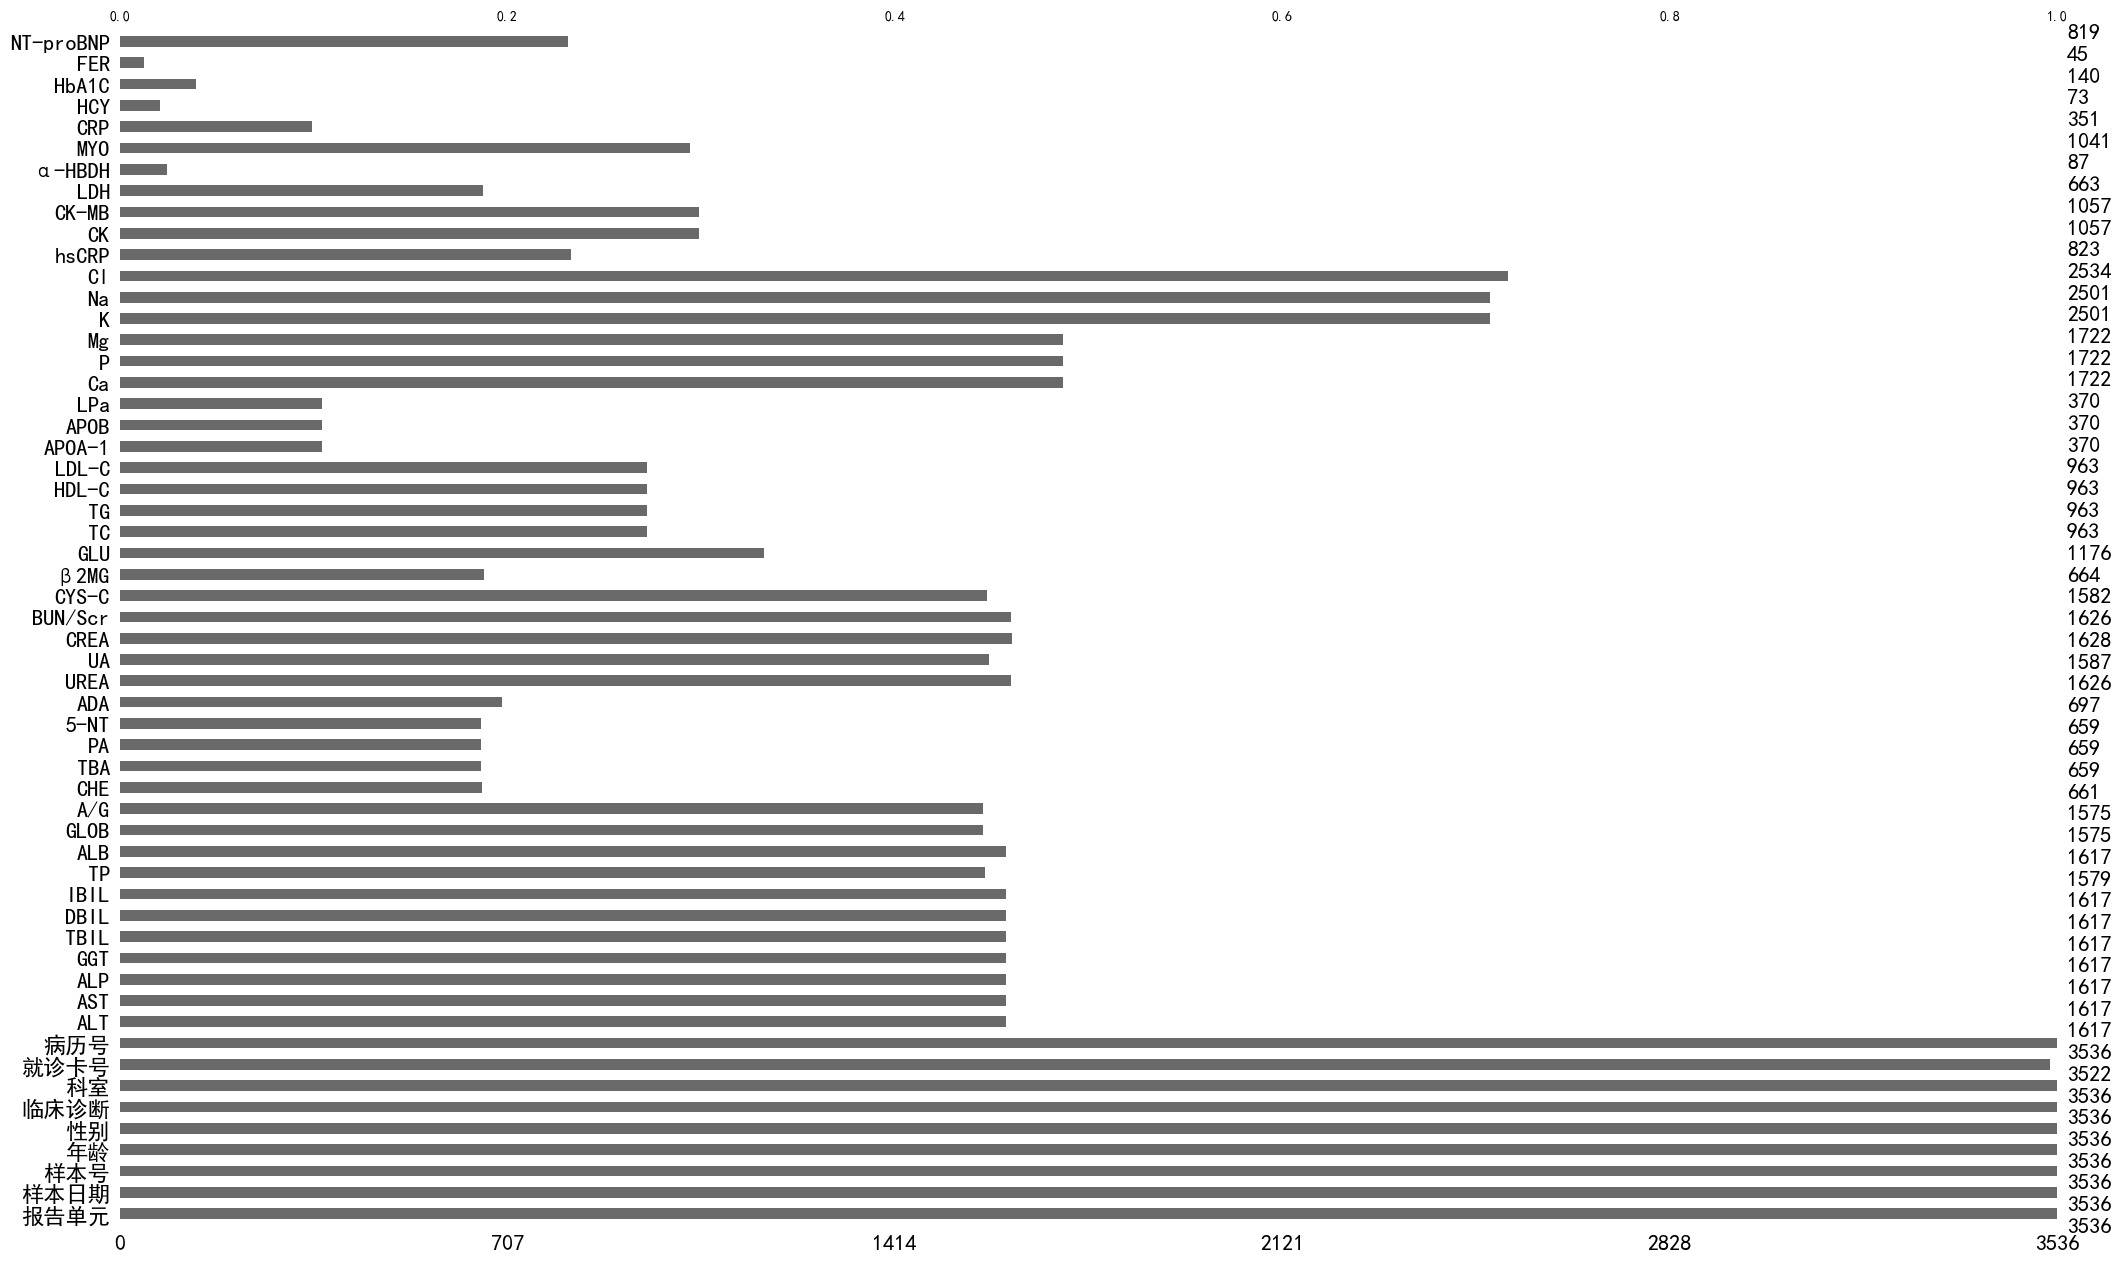

['报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'CHE', 'TBA', 'PA', '5-NT', 'ADA', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'β2MG', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 'APOA-1', 'APOB', 'LPa', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'hsCRP', 'CK', 'CK-MB', 'LDH', 'α-HBDH', 'MYO', 'CRP', 'HCY', 'HbA1C', 'FER', 'NT-proBNP']


In [18]:
# 计算每列NaN的数量
nan_count_per_column = df2.isnull().sum()

# 获取DataFrame的总行数
total_rows = df2.shape[0]

# 计算每列NaN的占比
nan_percentage = (nan_count_per_column / total_rows) * 100

# 找出占比大于或等于99%的列名
columns_to_drop = nan_percentage[nan_percentage >= 99].index.tolist()

# 删除这些列
df2_cleaned = df2.drop(columns=columns_to_drop)

# 显示清洗后的DataFrame

# 可视化缺失值
msno.bar(df2_cleaned)
plt.show()

exist2= nan_percentage[nan_percentage <99].index.tolist()
print(exist2)

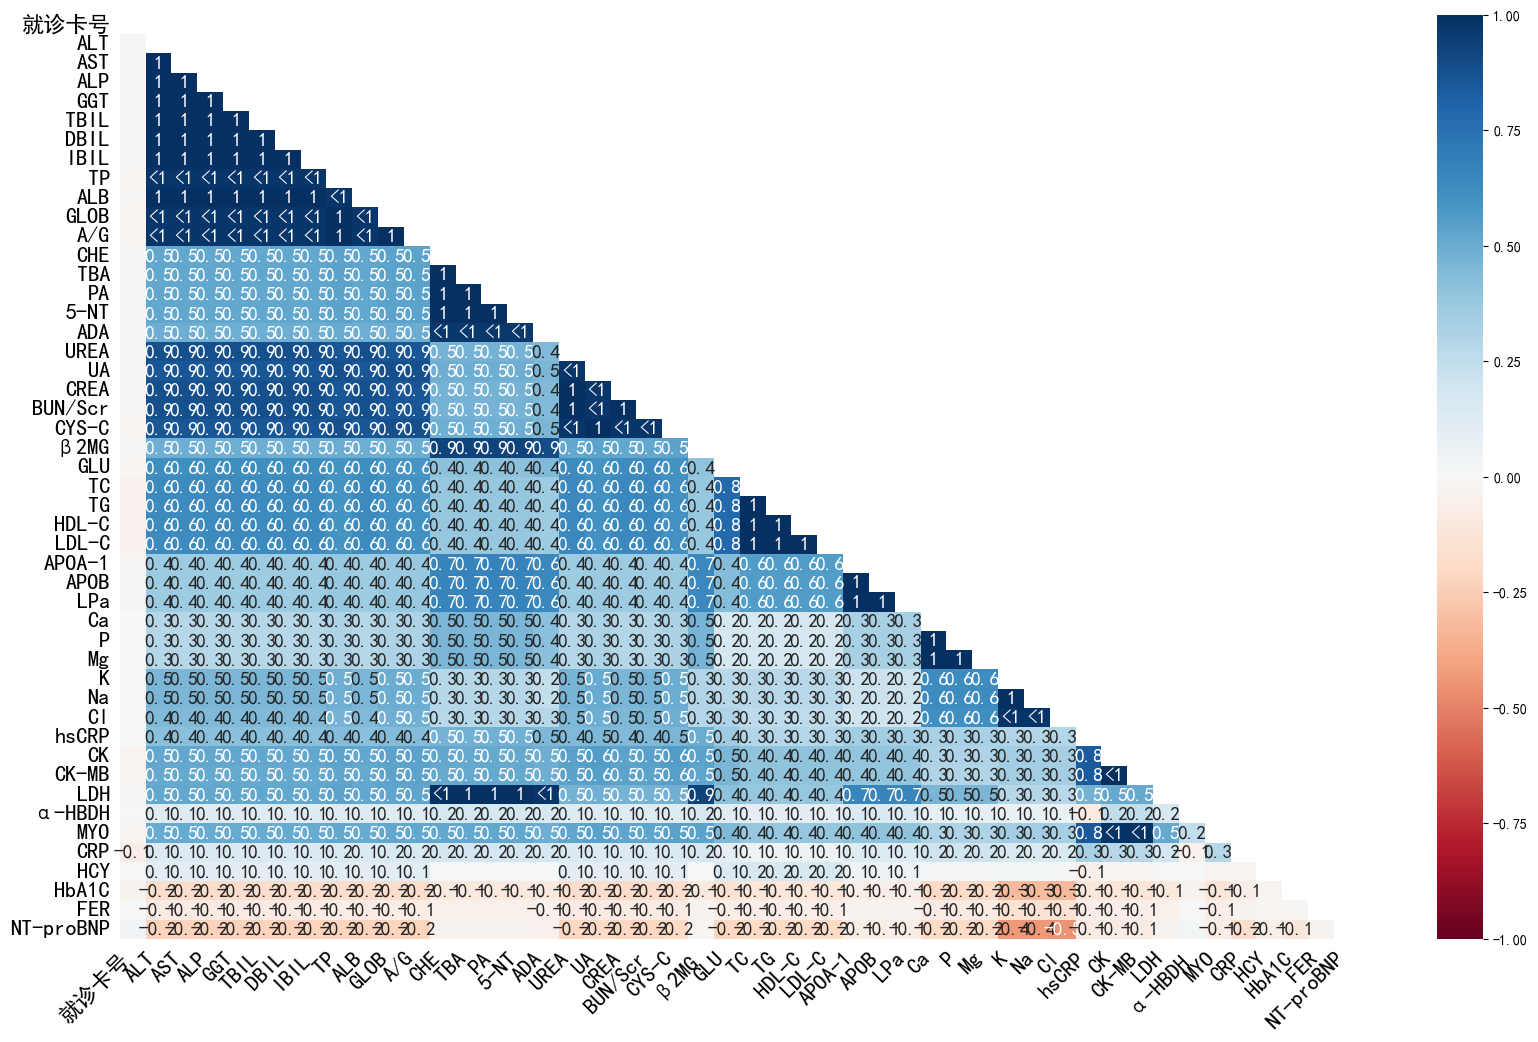

In [19]:
# 可视化缺失值
msno.heatmap(df2_cleaned)
plt.show()

df1--50%
'报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl','CK', 'CK-MB', 'MYO'

df2--75%
'报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号','ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C','GLU', 'TC', 'TG', 'HDL-C', 'LDL-C','Ca', 'P', 'Mg', 'K', 'Na', 'Cl','CK', 'CK-MB', 'MYO'



In [27]:
df2_cleaned1=df2_cleaned.drop(columns="FER")

In [28]:
# 查看数据总体概况
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 54 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   报告单元       3897 non-null   object 
 1   样本日期       3897 non-null   object 
 2   样本号        3897 non-null   int64  
 3   年龄         3897 non-null   object 
 4   性别         3897 non-null   object 
 5   临床诊断       3897 non-null   object 
 6   科室         3897 non-null   object 
 7   就诊卡号       3881 non-null   object 
 8   病历号        3897 non-null   object 
 9   ALT        3438 non-null   float64
 10  AST        3438 non-null   float64
 11  ALP        3438 non-null   float64
 12  GGT        3438 non-null   float64
 13  TBIL       3438 non-null   float64
 14  DBIL       3438 non-null   float64
 15  IBIL       3438 non-null   float64
 16  TP         3252 non-null   float64
 17  ALB        3438 non-null   float64
 18  GLOB       3252 non-null   float64
 19  A/G        3252 non-null   float64
 20  CHE     

In [29]:
# 查看数据总体概况
df2_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   报告单元       3536 non-null   object 
 1   样本日期       3536 non-null   object 
 2   样本号        3536 non-null   int64  
 3   年龄         3536 non-null   object 
 4   性别         3536 non-null   object 
 5   临床诊断       3536 non-null   object 
 6   科室         3536 non-null   object 
 7   就诊卡号       3522 non-null   object 
 8   病历号        3536 non-null   object 
 9   ALT        1617 non-null   float64
 10  AST        1617 non-null   float64
 11  ALP        1617 non-null   float64
 12  GGT        1617 non-null   float64
 13  TBIL       1617 non-null   float64
 14  DBIL       1617 non-null   float64
 15  IBIL       1617 non-null   float64
 16  TP         1579 non-null   float64
 17  ALB        1617 non-null   float64
 18  GLOB       1575 non-null   float64
 19  A/G        1575 non-null   float64
 20  CHE     

In [31]:
df1_cleaned_columns = ['报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号',
                       'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'CHE', 'TBA', 
                       'PA', '5-NT', 'ADA', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'β2MG', 'GLU', 'TC', 'TG', 
                       'HDL-C', 'LDL-C', 'APOA-1', 'APOB', 'LPa', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'hsCRP', 'CK',
                       'CK-MB', 'LDH', 'α-HBDH', 'MYO', 'CRP', 'HCY', 'NT-proBNP']
df2_cleaned1_columns = ['报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号',
                        'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'CHE', 'TBA',
                        'PA', '5-NT', 'ADA', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'β2MG', 'GLU', 'TC', 'TG', 
                        'HDL-C', 'LDL-C', 'APOA-1', 'APOB', 'LPa', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'hsCRP', 'CK',
                        'CK-MB', 'LDH', 'α-HBDH', 'MYO', 'CRP', 'HCY', 'HbA1C',  'NT-proBNP']

# 这里我们创建两个空的DataFrame来模拟
#df1 = pd.DataFrame(columns=df1_columns)
#df2 = pd.DataFrame(columns=df2_columns)

# 使用merge函数进行合并，how参数设置为'outer'可以实现行合，并且保留所有变量
data = pd.merge(df1_cleaned, df2_cleaned1, on=['报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号',
                        'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'CHE', 'TBA',
                        'PA', '5-NT', 'ADA', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'β2MG', 'GLU', 'TC', 'TG', 
                        'HDL-C', 'LDL-C', 'APOA-1', 'APOB', 'LPa', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'hsCRP', 'CK',
                        'CK-MB', 'LDH', 'α-HBDH', 'MYO', 'CRP', 'HCY', 'NT-proBNP' ], how= 'outer')

# 由于我们希望保留所有的变量，不需要额外的步骤来处理空值，因为merge函数会自动填充缺失值为NaN

print(data)

         报告单元        样本日期  样本号     年龄 性别  \
0      生化·流水线  2022/01/01  803    70岁  女   
1      生化·流水线  2022/01/01  804  56岁6月  男   
2      生化·流水线  2022/01/01  815  55岁7月  男   
3      生化·流水线  2022/01/01  818  52岁9月  男   
4      生化·流水线  2022/01/04  802  67岁2月  男   
...       ...         ...  ...    ... ..   
7428  生化·综合项目  2024/08/02    6  85岁1月  女   
7429  生化·综合项目  2024/08/02   30  82岁6月  女   
7430  生化·综合项目  2024/08/05   30  62岁1月  男   
7431  生化·综合项目  2024/08/06   95  61岁1月  女   
7432  生化·综合项目  2024/08/06   97  84岁7月  女   

                                                   临床诊断        科室  \
0                                                阿尔茨海默病   老年病科一病区   
1                                                阿尔茨海默病    精神科二病区   
2                                                阿尔茨海默病      PICU   
3                                                阿尔茨海默病      PICU   
4                                                阿尔茨海默病   老年病科三病区   
...                                                 ...  

In [32]:
data.head()

,报告单元,样本日期,样本号,年龄,性别,临床诊断,科室,就诊卡号,病历号,ALT,...,hsCRP,CK,CK-MB,LDH,α-HBDH,MYO,CRP,HCY,NT-proBNP,HbA1C
0,生化·流水线,2022/01/01,803,70岁,女,阿尔茨海默病,老年病科一病区,522632195112250021,00143532,22.0,...,3.1,67.0,14.0,198.0,NaN,69.4,NaN,NaN,NaN,NaN
1,生化·流水线,2022/01/01,804,56岁6月,男,阿尔茨海默病,精神科二病区,01001664,00140986,17.0,...,NaN,122.0,13.0,NaN,NaN,39.6,NaN,NaN,NaN,NaN
2,生化·流水线,2022/01/01,815,55岁7月,男,阿尔茨海默病,PICU,NaN,00140599,15.0,...,NaN,202.0,15.0,NaN,NaN,44.4,NaN,NaN,NaN,NaN
3,生化·流水线,2022/01/01,818,52岁9月,男,阿尔茨海默病,PICU,01006962,00138169,14.0,...,NaN,73.0,11.0,NaN,NaN,33.0,NaN,NaN,NaN,NaN
4,生化·流水线,2022/01/04,802,67岁2月,男,阿尔茨海默病,老年病科三病区,NaN,00139503,60.0,...,20.0,47.0,44.0,NaN,NaN,23.0,18.2,NaN,NaN,NaN


In [33]:
#data.to_csv('AD_merged.csv', index=False)

In [34]:
data.isnull().sum()

报告单元            0
样本日期            0
样本号             0
年龄              0
性别              0
临床诊断            0
科室              0
就诊卡号           30
病历号             0
ALT          2378
AST          2378
ALP          2378
GGT          2378
TBIL         2378
DBIL         2378
IBIL         2378
TP           2602
ALB          2378
GLOB         2606
A/G          2606
CHE          5091
TBA          5093
PA           5093
5-NT         5093
ADA          5055
UREA         2410
UA           2634
CREA         2408
BUN/Scr      2410
CYS-C        2646
β2MG         5093
GLU          3243
TC           3708
TG           3708
HDL-C        3708
LDL-C        3708
APOA-1       5837
APOB         5837
LPa          5837
Ca           3277
P            3277
Mg           3277
K            1544
Na           1544
Cl           1511
hsCRP        4698
CK           3408
CK-MB        3407
LDH          5089
α-HBDH       6714
MYO          3448
CRP          6790
HCY          7314
NT-proBNP    6097
HbA1C        7293
dtype: int

In [35]:
#计算缺失值占百分比
miss_value=((data.isnull().sum())/len(data))*100
print(miss_value.round(2))

报告单元          0.00
样本日期          0.00
样本号           0.00
年龄            0.00
性别            0.00
临床诊断          0.00
科室            0.00
就诊卡号          0.40
病历号           0.00
ALT          31.99
AST          31.99
ALP          31.99
GGT          31.99
TBIL         31.99
DBIL         31.99
IBIL         31.99
TP           35.01
ALB          31.99
GLOB         35.06
A/G          35.06
CHE          68.49
TBA          68.52
PA           68.52
5-NT         68.52
ADA          68.01
UREA         32.42
UA           35.44
CREA         32.40
BUN/Scr      32.42
CYS-C        35.60
β2MG         68.52
GLU          43.63
TC           49.89
TG           49.89
HDL-C        49.89
LDL-C        49.89
APOA-1       78.53
APOB         78.53
LPa          78.53
Ca           44.09
P            44.09
Mg           44.09
K            20.77
Na           20.77
Cl           20.33
hsCRP        63.20
CK           45.85
CK-MB        45.84
LDH          68.46
α-HBDH       90.33
MYO          46.39
CRP          91.35
HCY         

In [22]:
#对行进行删除
#df1_cleaned1 = df1_cleaned.dropna(how='any', axis=None)
#df1_cleaned_rows = df1_cleaned.dropna()

#df2_cleaned1 = df2_cleaned.dropna(how='any', axis=None)
#对行进行删除
#df2_cleaned_rows = df2_cleaned.dropna()

In [ ]:
#对是否患阿尔兹海默病的患者进行编码
# 创建DataFrame
df = pd.DataFrame(data)

# 创建一个只表示是否患有阿尔兹海默症的虚拟变量
df['阿尔兹海默病'] = df['临床诊断'].apply(lambda x: 1 if '阿尔茨海默病'in x else 0)

# 打印更新后的DataFrame
print(df)

In [ ]:
# 对性别进行独热编码
gender_encoded = pd.get_dummies(df['性别'], prefix='性别')

# 将独热编码的结果添加到df中，并删除原来的'性别'列
df = pd.concat([df.drop('性别', axis=1), gender_encoded], axis=1)

# 再次打印列名以确认独热编码的列已经添加
print("更新后的列名:", df.columns)

In [ ]:
#对年龄进行转换
def convert_age(age_str):
    if pd.isnull(age_str) or age_str.strip() == '':
        return None  # 返回 None 或者可以选择返回 0 或其他默认值
    try:
        age_str = age_str.strip()  # 移除可能的首尾空格
        parts = age_str.split('岁')
        years = int(parts[0])
        
        # 检查是否有月份信息，并且非空
        if len(parts) > 1 and parts[1].strip():
            months_part = parts[1].split('月')[0].strip()
            if months_part.isdigit():  # 确保月份部分是数字
                months = int(months_part)
            else:
                raise ValueError("月份部分不是有效的数字")
        else:
            months = 0  # 没有月份信息，默认为0

        return years + (months / 12.0)
    except (ValueError, IndexError) as e:
        # 打印错误信息，可以选择记录日志或进行其他错误处理
        print(f"转换年龄时发生错误: {e}")
        return None  # 或者返回适当的默认值
    
# 应用转换函数
df['年龄'] = df['年龄'].apply(convert_age)
print(df)

In [ ]:
#删除无用的特征
df.drop(['报告单元', '样本日期', '临床诊断', '科室', '就诊卡号', '病历号'],axis=1,inplace=True)
df.head()

In [ ]:
 df.columns


In [ ]:
#查看特征之间的相关性
# 计算DataFrame的相关系数矩阵，显式指定numeric_only为True
correlation_matrix = data.corr(numeric_only=True)

# 绘制热图
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
# 显示图形
plt.show()

In [24]:
#df.to_csv('AD_cleaned.csv', index=False)

In [25]:
df.shape

NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X = df[[
    '年龄', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP',
    'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU',
    'TC', 'TG', 'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'CK',
    'CK-MB', 'MYO', '性别_女', '性别_男']]

# 目标变量 y 是 df 中的一个列
y = df['阿尔兹海默病']

# 划分训练集和测试集，确保 stratify 参数是 y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 打印前几行数据以检查
print(df.head())

In [ ]:
# 标准化特征
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 创建逻辑回归模型
lr = LogisticRegression(C=1.0, random_state=0)  # 通常C的值小于1
lr.fit(X_train_std, y_train)

# 预测测试集
y_pred2 = lr.predict(X_test_std)

# 打印准确率
print('准确率: %.2f' % accuracy_score(y_test, y_pred2))

In [ ]:
#模型构建

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# XGBoost模型参数
params_xgb = {    'learning_rate': 0.02,            # 学习率，控制每一步的步长，用于防止过拟合。典型值范围：0.01 - 0.1    
              'booster': 'gbtree',              # 提升方法，这里使用梯度提升树（Gradient Boosting Tree）   
              'objective': 'binary:logistic',   # 损失函数，这里使用逻辑回归，用于二分类任务  
              'max_leaves': 127,                # 每棵树的叶子节点数量，控制模型复杂度。较大值可以提高模型复杂度但可能导致过拟合   
              'verbosity': 1,                   # 控制 XGBoost 输出信息的详细程度，0表示无输出，1表示输出进度信息    
              'seed': 42,                       # 随机种子，用于重现模型的结果   
              'nthread': -1,                    # 并行运算的线程数量，-1表示使用所有可用的CPU核心   
              'colsample_bytree': 0.6,          # 每棵树随机选择的特征比例，用于增加模型的泛化能力   
              'subsample': 0.7,                 # 每次迭代时随机选择的样本比例，用于增加模型的泛化能力    
              'eval_metric': 'logloss'          # 评价指标，这里使用对数损失（logloss）
             }
# 初始化XGBoost分类模型
model_xgb = xgb.XGBClassifier(**params_xgb)

In [ ]:
# 定义参数网格，用于网格搜索
param_grid = {    'n_estimators': [100, 200, 300, 400, 500],  # 树的数量    
              'max_depth': [3, 4, 5, 6, 7],               # 树的深度    
              'learning_rate': [0.01, 0.02, 0.05, 0.1],   # 学习率
             }


# 使用GridSearchCV进行网格搜索和k折交叉验证
grid_search = GridSearchCV(    estimator=model_xgb,   
                           param_grid=param_grid,    
                           scoring='neg_log_loss',  # 评价指标为负对数损失   
                           cv=5,                    # 5折交叉验证   
                           n_jobs=-1,               # 并行计算    
                           verbose=1                # 输出详细进度信息
                          )



# 训练模型
grid_search.fit(X_train, y_train)



# 输出最优参数
print("Best parameters found: ", grid_search.best_params_)
print("Best Log Loss score: ", -grid_search.best_score_)

# 使用最优参数训练模型
best_model = grid_search.best_estimator_


In [ ]:
#模型评价
from sklearn.metrics import classification_report# 预测测试集
y_pred = best_model.predict(X_test)# 输出模型报告， 查看评价指标
print(classification_report(y_test, y_pred))

In [ ]:
#ROC曲线
from sklearn.metrics import roc_curve, auc# 预测概率
y_score = best_model.predict_proba(X_test)[:, 1]# 计算ROC曲线
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_score)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#模型保存
import joblib# 保存模型
joblib.dump(best_model , 'XGBoost.pkl')